In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [118]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
#create model
model = Sequential()
#add model layers
model.add(Conv2D(3, kernel_size=3, activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(3, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='softmax'))
model.add(Dense(1, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mae'])

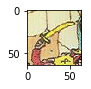

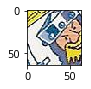

In [119]:
import glob

waldo = []
for img_name in glob.glob('Data/64/waldo/*'):
    waldo.append(cv2.cvtColor(cv2.imread(img_name, 1), cv2.COLOR_BGR2RGB))
not_waldo = []
for img_name in glob.glob('Data/64/notwaldo/*'):
    not_waldo.append(cv2.cvtColor(cv2.imread(img_name, 1), cv2.COLOR_BGR2RGB))
    
plt.figure(figsize=(2, 1))
plt.imshow(waldo[0])
plt.figure(figsize=(2, 1))
plt.imshow(not_waldo[0])

In [120]:
from sklearn.utils import shuffle
import torch

X = waldo + not_waldo

waldo_labels = [True for w in waldo]
not_waldo_labels = [False for nw in not_waldo]
Y = waldo_labels + not_waldo_labels

X, Y = shuffle(np.array(X), np.array(Y))
cut_test = int(len(X)*0.8)
X_train = X[:cut_test]
y_train = Y[:cut_test]
X_test = X[cut_test:]
y_test = Y[cut_test:]
print(Y)
#X_train_torch = [torch.from_numpy(x).type('torch.FloatTensor') for x in X_train]
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

# Dataset_train = zip(X_train_torch, Y_train)

[False False False ... False False False]
Train on 4300 samples, validate on 1076 samples
Epoch 1/3
4300/4300 [==============================] - 3s 713us/step - loss: 15.8275 - mean_absolute_error: 0.9928 - val_loss: 15.8239 - val_mean_absolute_error: 0.9926
Epoch 2/3
4300/4300 [==============================] - 3s 610us/step - loss: 15.8275 - mean_absolute_error: 0.9928 - val_loss: 15.8239 - val_mean_absolute_error: 0.9926
Epoch 3/3
4300/4300 [==============================] - 3s 613us/step - loss: 15.8275 - mean_absolute_error: 0.9928 - val_loss: 15.8239 - val_mean_absolute_error: 0.9926


In [121]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 62, 62, 3)         84        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 3)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 29, 29, 3)         84        
_________________________________________________________________
flatten_10 (Flatten)         (None, 2523)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               252400    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 101       
Total params: 252,669
Trainable params: 252,669
Non-trainable params: 0
_________________________________________________________________
